In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('train.csv')
df.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Names and indices of the columns:

In [46]:
col_names = {}
for col in df.columns:
    col_names[col] = df.columns.get_loc(col)
print(col_names)

df.iloc[:,1].count()

{'id': 0, 'Basic_Demos-Enroll_Season': 1, 'Basic_Demos-Age': 2, 'Basic_Demos-Sex': 3, 'CGAS-Season': 4, 'CGAS-CGAS_Score': 5, 'Physical-Season': 6, 'Physical-BMI': 7, 'Physical-Height': 8, 'Physical-Weight': 9, 'Physical-Waist_Circumference': 10, 'Physical-Diastolic_BP': 11, 'Physical-HeartRate': 12, 'Physical-Systolic_BP': 13, 'Fitness_Endurance-Season': 14, 'Fitness_Endurance-Max_Stage': 15, 'Fitness_Endurance-Time_Mins': 16, 'Fitness_Endurance-Time_Sec': 17, 'FGC-Season': 18, 'FGC-FGC_CU': 19, 'FGC-FGC_CU_Zone': 20, 'FGC-FGC_GSND': 21, 'FGC-FGC_GSND_Zone': 22, 'FGC-FGC_GSD': 23, 'FGC-FGC_GSD_Zone': 24, 'FGC-FGC_PU': 25, 'FGC-FGC_PU_Zone': 26, 'FGC-FGC_SRL': 27, 'FGC-FGC_SRL_Zone': 28, 'FGC-FGC_SRR': 29, 'FGC-FGC_SRR_Zone': 30, 'FGC-FGC_TL': 31, 'FGC-FGC_TL_Zone': 32, 'BIA-Season': 33, 'BIA-BIA_Activity_Level_num': 34, 'BIA-BIA_BMC': 35, 'BIA-BIA_BMI': 36, 'BIA-BIA_BMR': 37, 'BIA-BIA_DEE': 38, 'BIA-BIA_ECW': 39, 'BIA-BIA_FFM': 40, 'BIA-BIA_FFMI': 41, 'BIA-BIA_FMI': 42, 'BIA-BIA_Fat':

np.int64(3960)

Counting the number of NaN entries in a column:

In [40]:
df.iloc[:,55].isna().sum()

np.int64(1227)

Note that we are trying to predict the Severity Impairment Index (SII). This comes from the PCIAT_total column, according to the following conversion: Severity Impairment Index: 0-30=None; 31-49=Mild; 50-79=Moderate; 80-100=Severe. 

In [79]:
df["PCIAT-PCIAT_Total"].isna().sum()

np.int64(1224)

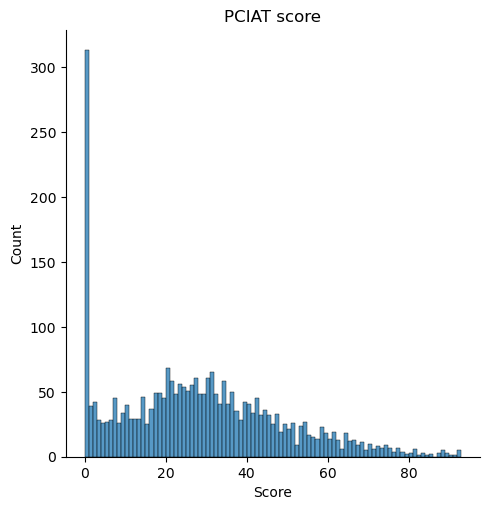

In [80]:
sns.displot(df, x="PCIAT-PCIAT_Total",binwidth=1)
plt.title('PCIAT score')
plt.xlabel("Score");
plt.ylabel("Count");

plt.show()


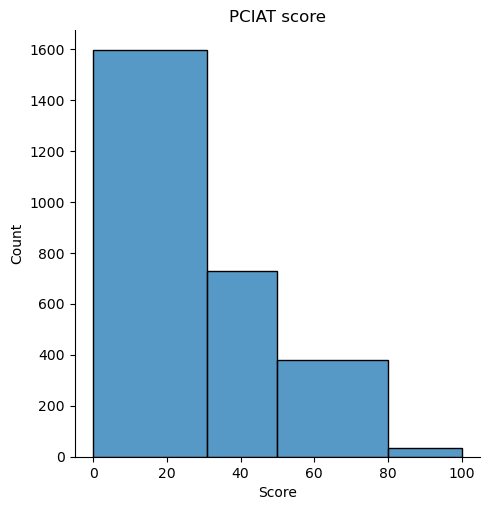

In [82]:
sns.displot(df, x="PCIAT-PCIAT_Total",bins=[0,31,50,80,100])
plt.title('PCIAT score')
plt.xlabel("Score");
plt.ylabel("Count");

plt.show()

So we have 1224 unlabeled cases (for which we must employ unsupervised techniques, if we use them) and 

Count the number of NaN entries in each column; out of 3960 total entries. Lots of missing data!

[np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1405), np.int64(1539), np.int64(650), np.int64(938), np.int64(933), np.int64(884), np.int64(3062), np.int64(1006), np.int64(993), np.int64(1006), np.int64(2652), np.int64(3217), np.int64(3220), np.int64(3220), np.int64(614), np.int64(1638), np.int64(1678), np.int64(2886), np.int64(2898), np.int64(2886), np.int64(2897), np.int64(1650), np.int64(1689), np.int64(1655), np.int64(1693), np.int64(1653), np.int64(1691), np.int64(1636), np.int64(1675), np.int64(1815), np.int64(1969), np.int64(1969), np.int64(1969), np.int64(1969), np.int64(1969), np.int64(1969), np.int64(1969), np.int64(1969), np.int64(1969), np.int64(1969), np.int64(1969), np.int64(1969), np.int64(1969), np.int64(1969), np.int64(1969), np.int64(1969), np.int64(3485), np.int64(3485), np.int64(2239), np.int64(2239), np.int64(1224), np.int64(1227), np.int64(1226), np.int64(1229), np.int64(1229), np.int64(1231), np.int64(1228), np.int64(1231), np.int64(1230), np.int64(

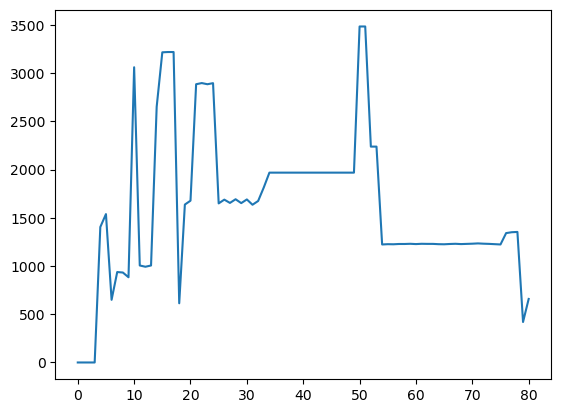

In [42]:
num_nan = []
for n in range(81):
    num_nan.append(df.iloc[:,n].isna().sum())
print(num_nan)

plt.plot(num_nan)
plt.show()

Distribution of ages in the data:

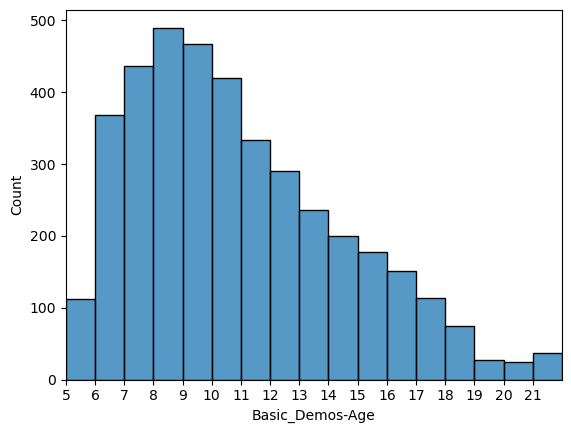

In [53]:
fig, ax = plt.subplots()
sns.histplot(df, x="Basic_Demos-Age",binwidth=1)
ax.set_xlim(5,22)
ax.set_xticks(range(5,22))
plt.show()

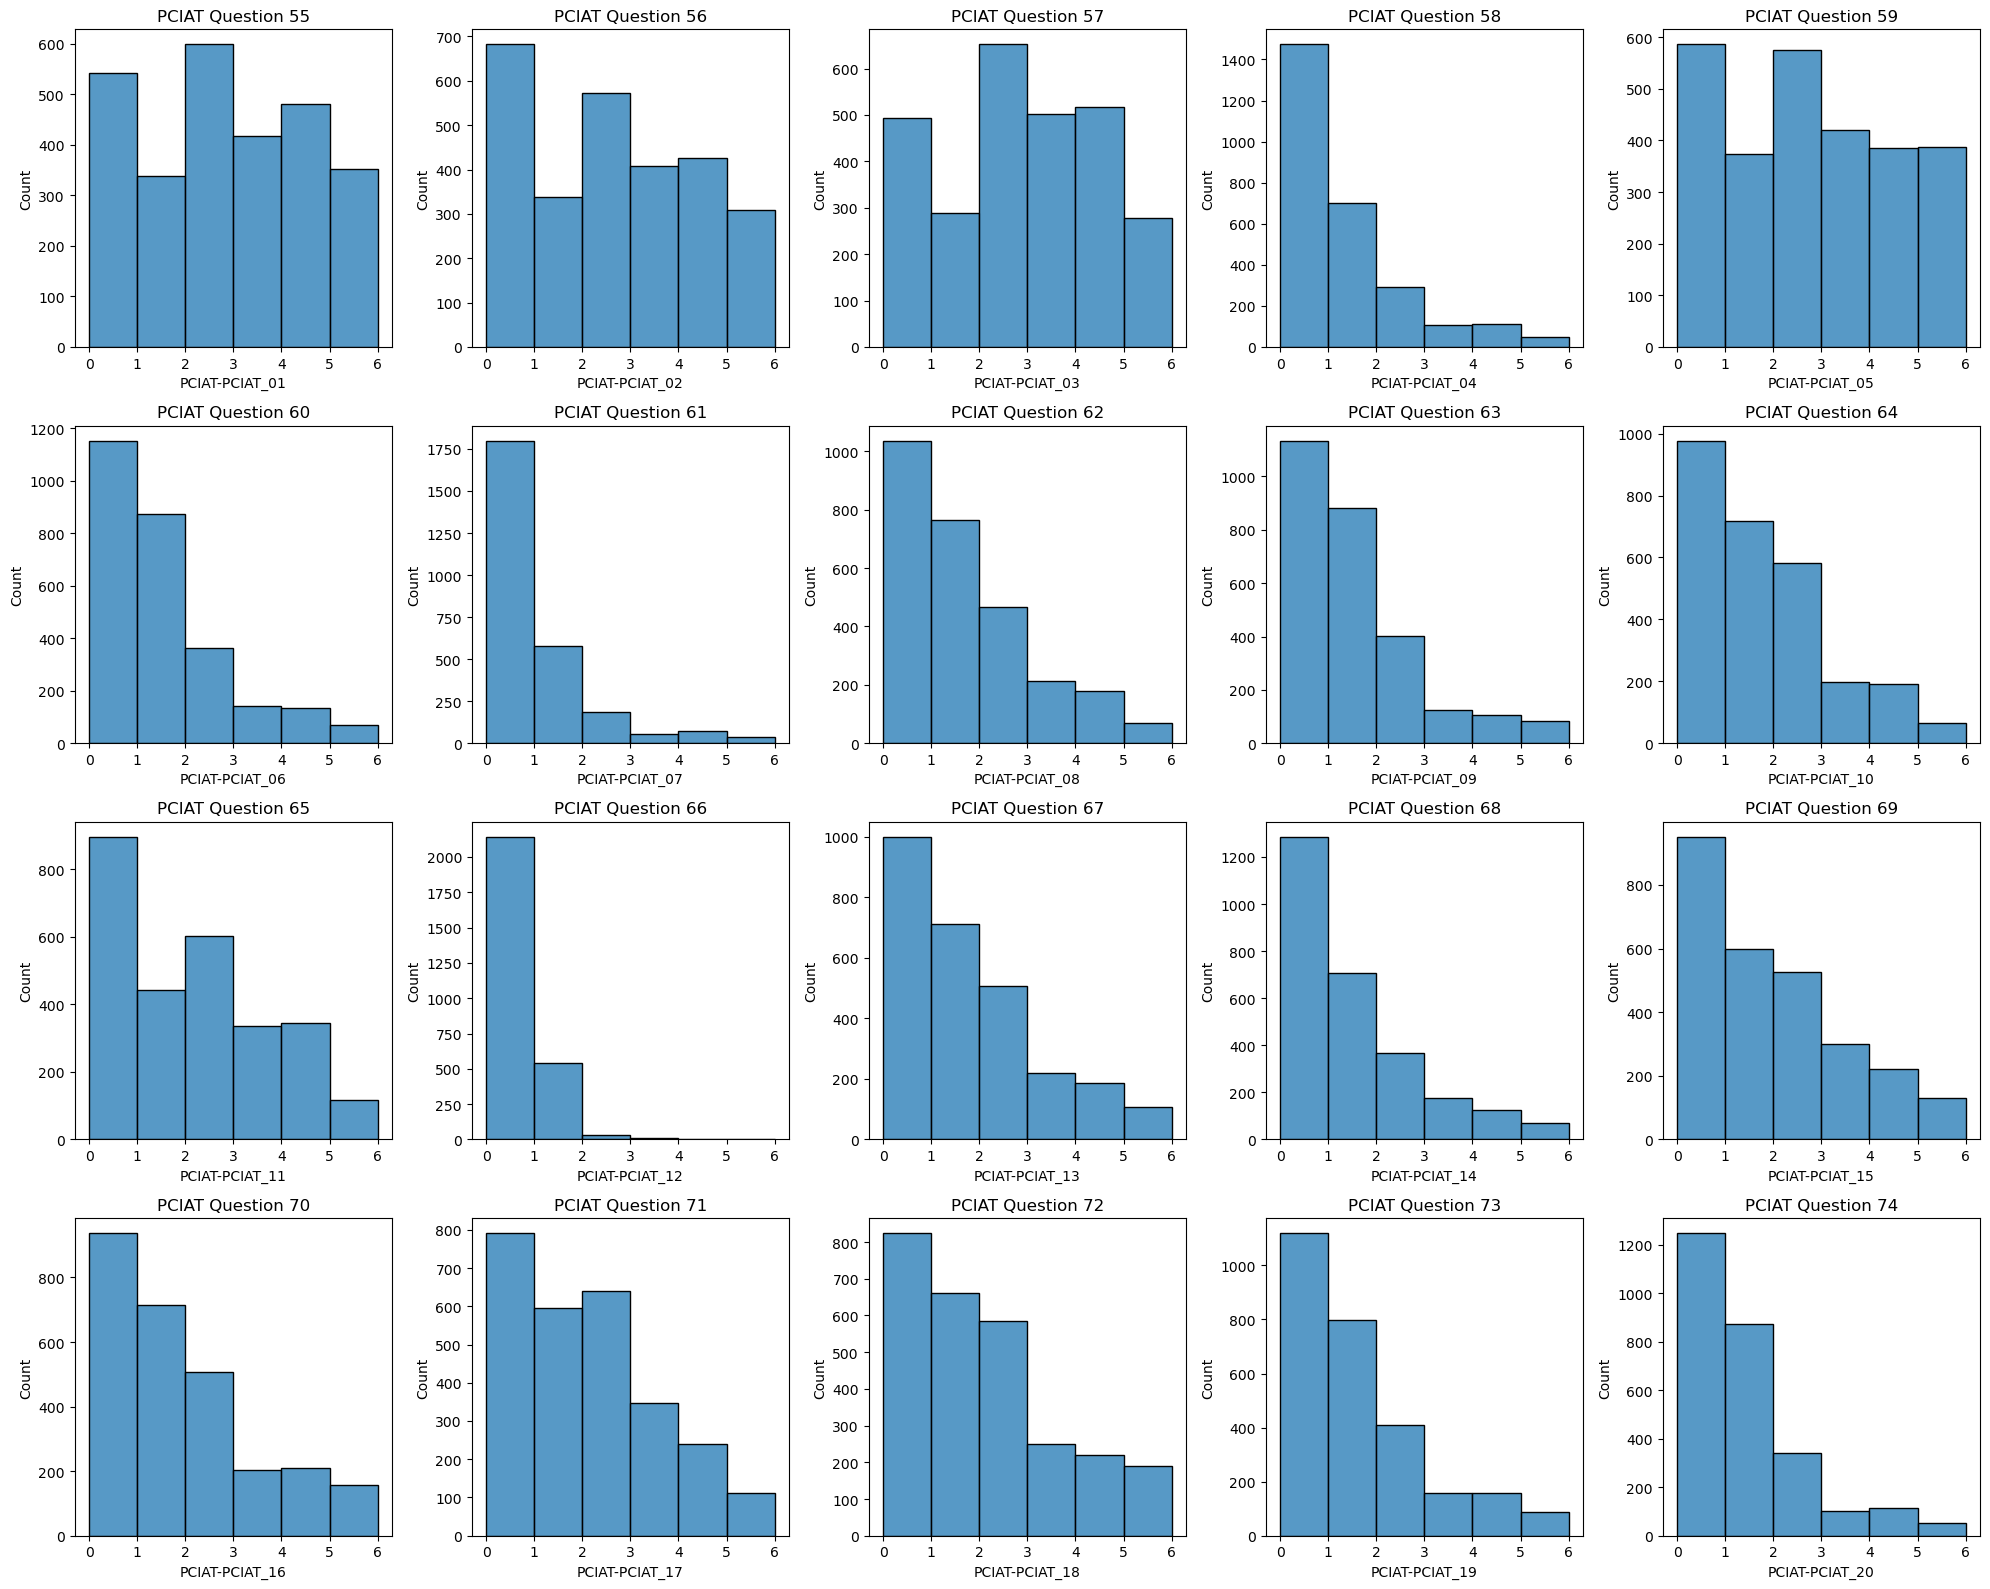

In [74]:
# Histograms for all 20 PCIAT items

# Create a figure with a 4x5 grid of subplots (for a total of 20 subplots)
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))  # Adjusted figsize for better layout
axes = axes.flatten()

# Loop through the selected columns (columns 55 to 74) and create histograms
for i, col in enumerate(range(55, 75)): 
    ax = axes[i]
    sns.histplot(df, x=df.iloc[:, col], bins=[0,1,2,3,4,5,6], ax=ax)
    ax.set_title(f'PCIAT Question {col}')  

plt.tight_layout()
plt.show()
